Как правило, дифференцируемые модели обучаются с помощью градиентного спуска, а для него важно уметь считать градиент функционала ошибки по параметрам модели. Можно считать градиент покоординатно, а потом пристально смотреть на формулы и пытаться понять, как это может выглядеть в векторной форме. Гораздо проще считать градиент напрямую --- а для этого поможет знание градиентов для основных функций и основных правил матрично-векторного дифференцирования.

##Вывод основных формул

Для начала вспомним определение производной для обычной функции одной переменной.
Говорят, что у функции $f: R \to R$ в точке $x$ есть производная $f'(x)$,
если в этой точке функция представима в следующем виде для всех достаточно маленьких $\mathrm{d}x$:
$$
    f(x + \mathrm{d}x)
    =
    f(x)
    +
    f'(x) \mathrm{d}x
    +
    o(\mathrm{d}x).
$$
То есть производная --- это коэффициент, определяющий линейную часть приращения функции.
Обобщим это на случай функций, работающих в конечномерных линейных пространствах с нормами.
Говорят, что функция $f: R^n \to R^m$ дифференцируема в точке $x$,
если существует такой линейный оператор $L: R^n \to R^m$, что для любых достаточно
малых по норме $\mathrm{d}x \in R^n$ выполнено
$$
    f(x + \mathrm{d}x)
    =
    f(x)
    +
    L[\mathrm{d}x]
    +
    o(\|\mathrm{d}x\|).
$$
Можно показать, что если функция дифференцируема в точке $x$,
то соответствующий линейный оператор определяется единственным образом.
Будем обозначать его как $\mathrm{d}f(x)$ и называть дифференциалом.
Поскольку дифференциал --- это линейный оператор, то в зависимости от размерностей
пространств он может быть представлен как скалярное произведение $\langle a_x, dx{x} \rangle$,
умножение на матрицу $A_x dx{x}$ или схожим образом.
Тогда по аналогии с одномерным случаем вектор $a_x$ или матрица $A_x$ являются <<производными>>
функции в точке $x$.
Как мы знаем, для них есть специальные названия: $a_x$ называется градиентом, $A_x$ --- матрицей Якоби.

Когда мы работали с одномерными функциями, в большинстве случаев для поиска производных нам хватало небольшой таблицы со стандартными случаями и пары правил.
Для случая векторных и матричных функций все эти правила можно обобщить, а таблицы дополнить специфическими функциями вроде определителя.
Удобнее всего оказывается работать в терминах «дифференциала» --- с ним можно не задумываться о промежуточных размерностях, а просто применять стандартные правила.

Введём некоторые обозначения:

* При отображении вектора в число $f(x): R^n \to R$
$$
\nabla_x f(x)
   =
        \bigg[
            \frac{\partial f}{\partial x_1},
            \dots,
            \frac{\partial f}{\partial x_n}
        \bigg]^T
$$

* При отображении матрицы в число $f(A): R^{n \times m} \to R$
$$
\nabla_A f(A)
        =
        \bigg(
            \frac{\partial f}{\partial A_{ij}}
        \bigg)_{i,j=1}^{n,m}
$$
    
* При отображении вектора в вектор $f(x): R^n \to R^m$
$$
  \mathfrak{J}_x = \bigg(
   \frac{\partial f_{i}}{\partial x_{j}}
   \bigg)_{i,j=1}^{n,m}
$$



Мы хотим оценить, как функция изменяется по каждому из аргументов по отдельности. Поэтому производной функции по вектору будет вектор, по матрице --- матрица.

Нарисуем таблицу с тем, как выглядят дифференциалы для разных случаев. По строчкам будем откладывать то, откуда бьёт функция, то есть входы. По столбцам будем откладывать то, куда бьёт функция, то есть выходы. На пересечении будут расположены дифференциалы. Для ситуаций, обозначенных прочерками, обобщения получить не выйдет.


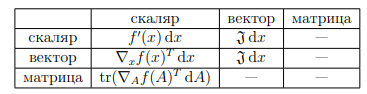


Всегда, когда мы будем сталкиваться с дифференцированием на практике, мы будем выяснять, к какой из ситуации относится задача, а дальше сводит дифференциал к виду из таблицы выше и вытаскивать из него производную.

%Дифференциал --- это линейная часть приращения функции. Если мы находимся в какой-то точке $x_0$ и делаем из неё небольшое приращение $dx{x},$ то наша функция изменится примерно на $dx{f(x)}$.


*  Для функции, которая бьёт \textbf{из скаляров в скаляры} $f(x) : R \to R$ дифференциал выглядит как $dx{f(x)} = f'(x) dx{x}$.

*  Когда функция бьёт \textbf{из векторов в скаляры} $f(x) : R^n \to R.$, мы имеем дело с функцией нескольких переменных. Нам нужно взять производную по каждой из них и получить вектор производных, градиент

$$
\nabla_x f = \begin{pmatrix} \frac{\partial f}{\partial x_1} \\ \ldots  \\ \frac{\partial f}{\partial x_n} \end{pmatrix}
$$

Если умножить транспонированный градиент на вектор приращений, у нас получится дифференциал

$$
dx{f(x)} = \nabla_x f^T dx{x} = \begin{pmatrix} \frac{\partial f}{\partial x_1}, & \ldots,  & \frac{\partial f}{\partial x_n} \end{pmatrix} \begin{pmatrix} dx{x_1} \\  \ldots  \\ dx{x_n} \end{pmatrix} = \frac{\partial f}{\partial x_1} \cdot dx{x_1} + \ldots +\frac{\partial f}{\partial x_n} \cdot dx{x_n}.
$$

При изменении $x_i$ на $dx{x_i}$ функция будет при прочих равных меняться пропорционально соответствующей частной производной.

* Когда функция бьёт \textbf{из векторов в векторы} $f(x) : R^n \to R^m$, мы взаимодействуем с семейством функций. Например, если $n=1$ то у нас есть $m$ функций, каждая из которых применяется к $x$. На выходе получается вектор

$$
\begin{pmatrix} f_1(x) \\ f_2(x) \\ \ldots  \\ f_m(x). \end{pmatrix}
$$


Если мы хотим найти производную, нужно взять частную производную каждой функции по $x$ и записать в виде вектора. Дифференциал также будет представлять из себя вектор, так как при приращении аргумента на какую-то величину изменяется каждая из функций

$$
dx{f(x)} = \begin{pmatrix} \frac{\partial f_1}{\partial x} \\ \frac{\partial f_2}{\partial x} \\ \ldots  \\ \frac{\partial f_m}{\partial x} \end{pmatrix} \cdot \begin{pmatrix} dx{x}  \end{pmatrix}  = \begin{pmatrix} \frac{\partial f_1}{\partial x} dx{x} \\ \frac{\partial f_2}{\partial x} dx{x} \\ \ldots  \\ \frac{\partial f_m}{\partial x} dx{x} \end{pmatrix}.
$$

Тут мы умножаем каждую строчку из вектора размера $n \times 1$ на столбец матрицы $1 \times 1$. Если хочется, можно рассуждать об этом как о поэлементном умножении. Если $n > 1$, то аргументов на вход в такой вектор из функций идёт несколько, на выходе получается матрица

$$
\begin{pmatrix} f_1(x_1) & f_1(x_2) & \ldots & f_1(x_n) \\ f_2(x_1)  & f_2(x_2) & \ldots & f_2(x_n)  \\ \ldots & \ldots & \ddots & \ldots  \\ f_m(x_1)  & f_m(x_2) & \ldots & f_m(x_n) \end{pmatrix}
$$
  
Производной такой многомерной функции будет матрица из частных производных каждой функции по каждому аргументу

$$
\begin{pmatrix} \frac{\partial f_1}{\partial x_1} & \frac{\partial f_1}{\partial x_2} & \ldots & \frac{\partial f_1}{\partial x_n} \\ \frac{\partial f_2}{\partial x_1}  & \frac{\partial f_2}{\partial x_2} & \ldots & \frac{\partial f_2}{\partial x_n}  \\ \ldots & \ldots & \ddots & \ldots  \\ \frac{\partial f_m}{\partial x_1}  & \frac{\partial f_m}{\partial x_2} & \ldots & \frac{\partial f_m}{\partial x_n} \end{pmatrix}.
$$


Дифференциал снова будет представлять из себя вектор

$$
dx{f(x)} =  \begin{pmatrix} \frac{\partial f_1}{\partial x_1} & \frac{\partial f_1}{\partial x_2} & \ldots & \frac{\partial f_1}{\partial x_n} \\ \frac{\partial f_2}{\partial x_1}  & \frac{\partial f_2}{\partial x_2} & \ldots & \frac{\partial f_2}{\partial x_n}  \\ \ldots & \ldots & \ddots & \ldots  \\ \frac{\partial f_m}{\partial x_1}  & \frac{\partial f_m}{\partial x_2} & \ldots & \frac{\partial f_m}{\partial x_n} \end{pmatrix} \cdot  \begin{pmatrix} dx{x_1} \\ dx{x_2} \\ \ldots  \\ dx{x_n} \end{pmatrix} =  \begin{pmatrix} \frac{\partial f_1}{\partial x_1} dx{x_1} + \frac{\partial f_1}{\partial x_2} dx{x_2} + \ldots + \frac{\partial f_1}{\partial x_n} dx{x_n}  \\ \frac{\partial f_2}{\partial x_1} dx{x_1} +  \frac{\partial f_2}{\partial x_2} dx{x_2} + \ldots + \frac{\partial f_2}{\partial x_n} dx{x_n}  \\ \ldots  \\ \frac{\partial f_m}{\partial x_1} dx{x_1} + \frac{\partial f_m}{\partial x_2} dx{x_2} + \ldots + \frac{\partial f_m}{\partial x_n} dx{x_n} \end{pmatrix}.
$$

* Функция бьёт \textbf{из матриц в скаляры} $f(A) : R^{n \times k} \to R.$В таком случае нам надо найти производную функции по каждому элементу матрицы, то есть дифференциал будет выглядеть как

$$
dx{f(A)} = \frac{\partial f}{\partial a_{11}} dx{a_{11}} + \ldots + \frac{\partial f}{\partial a_{nk}} dx{a_{nk}}.
$$

Его можно записать в компактном виде через след матрицы как
$$
dx{f(A)} = Tr(\nabla_A f^T dx{A}),
$$

Вполне естественен вопрос --- а почему это можно записать именно так?  Давайте попробуем увидеть этот факт на каком-нибудь простом примере. Пусть у нас есть две матрицы

$$
A_{[2 \times 3]} = \begin{pmatrix} a_{11} & a_{12} & a_{13} \\ a_{21} & a_{22} & a_{23} \end{pmatrix} \qquad B_{[2 \times 3]} = \begin{pmatrix} b_{11} & b_{12} & b_{13} \\ b_{21} & b_{22} & b_{23} \end{pmatrix}.
$$

Посмотрим на то, как выглядит $Tr(B^T dx{A})$. Как это ни странно, он совпадает с дифференциалом

$$Tr(B^T dx{A}) = Tr \left( \begin{pmatrix} b_{11} & b_{21} \\ b_{12} & b_{22} \\ b_{13} &  b_{23} \end{pmatrix} \begin{pmatrix} dx a_{11} & dx a_{12} & dx a_{13} \\ dx a_{21} & dx a_{22} & dx a_{23} \end{pmatrix} \right),
$$

при произведении на выходе получаем матрицу размера $3 \times 3$

$$
\begin{pmatrix} b_{11} dx a_{11} +  b_{21} dx a_{21} & b_{11} dx a_{12} +  b_{21} dx a_{22} & b_{11} dx a_{13} +  b_{21} dx a_{23} \\ b_{12} dx a_{11} +  b_{22} dx a_{21} & b_{12} dx a_{12} +  b_{22} dx a_{22} & b_{12} dx a_{13} +  b_{22} dx a_{23} \\ b_{13} dx a_{11} +  b_{23} dx a_{21} & b_{13} dx a_{12} +  b_{23} dx a_{22} & b_{13} dx a_{13} +  b_{23} dx a_{23} \end{pmatrix}.
$$

Когда мы берём её след, остаётся сумма элементов по диагонали. Это и есть требуемый дифференциал. Дальше мы периодически будем пользоваться таким приёмом.



Например,  величину $||X-A||^2 = \sum_{i,j} (x_{ij} - a_{ij})^2$ можно записать в матричном виде как  $Tr((X-A)^T (X-A)).$

* В таблице осталось ещё несколько ситуаций, которые остались вне поля нашего зрения.  Например, давайте посмотрим на ситуацию когда отображение бьёт из матриц в векторы $f(A) : R^{n \times k} \to R^m.$

Тогда $A$ матрица, а $f(A)$ вектор. Нам надо найти производную каждого элемента из вектора $f(A)$ по каждому элементу из матрицы $A$. Получается, что $\frac{\partial f}{\partial A}$ --- это трёхмерная структура. Мы с такими ситуациями встречаться не будем, поэтому опустим их.


Свойства матричных дифференциалов очень похожи на свойства обычных. Надо только не забыть, что мы работаем с матрицами.

$$
 dx{(AB)} = dx{A}B + Adx{B}, \quad dx{A}B \ne Bdx{A}
 $$

 $$
   dx{(\alpha A + \beta B)} = \alpha dx{A} + \beta dx{B}
 $$

 $$
   dx{(A^T)} = (dx{A})^T
  $$

  $$
     dx{C} = 0, \quad C - \text{матрица из констант}
$$

Чтобы доказать все эти свойства достаточно просто аккуратно расписать их. Кроме этих правил нам понадобится пара трюков по работе со скалярами. Если $s$ --- скаляр размера $1 \times 1$, тогда $s^T = s$ и $Tr(s) = s$.

С помощью этих преобразований мы будем приводить дифференциалы к каноническому виду и вытаскивать из них производные.



**Задача 1.**  Пусть $a \in \mathbb{R}^n$ --- вектор параметров, а $x \in \mathbb{R}^n$ --- вектор переменных. Рассмотрим функцию, которая представляет из себя их скалярное произведение $f(x) = a^T x$. Нужно найти её производную по вектору переменных  $\nabla_x f(x)$.


**Решение**
Функция $f(x)$ бьёт из векторов в скаляры $f(x) : R^n \to R.$ Если мы хотим найти производную функции $f(x_1, x_2, \ldots, x_n)$, нам надо взять производную по каждому аргументу и выписать градиент. Можно расписать умножение одного вектора на другой в виде привычной нам формулы

$$
\underset{[1 \times 1]}{f(x)} = \underset{[1 \times n]}{a^T} \cdot \underset{[n \times 1]}{x} = \begin{pmatrix} a_1 & a_2 & \ldots &a_n \end{pmatrix} \cdot \begin{pmatrix} x_1 \\ x_2 \\ \ldots  \\ x_n \end{pmatrix} = a_1 \cdot x_1 + a_2 \cdot x_2 + \ldots + a_n \cdot x_n.
$$

Из неё чётко видно, что $\frac{\partial f}{\partial x_i} = a_i$

$$
\nabla_x f = \begin{pmatrix} \frac{\partial f}{\partial x_1} \\ \frac{\partial f}{\partial x_2} \\ \ldots  \\ \frac{\partial f}{\partial x_n} \end{pmatrix} = \begin{pmatrix} a_1 \\ a_2 \\ \ldots  \\ a_n \end{pmatrix} = a,
$$

теперь можно записать дифференциал

$$
dx{f} = a^T dx{x} = \frac{\partial f}{\partial x_1} \cdot dx{x_1} + \ldots +\frac{\partial f}{\partial x_n} \cdot dx{x_n} = a_1 \cdot dx{x_1} + \ldots + a_n \cdot dx{x_n}.
$$

В то же самое время можно было бы просто воспользоваться правилами нахождения матричных дифференциалов

$$
dx{f} =  dx{a^T x} = a^T dx{x} = \nabla_x f^T dx{x},
$$

откуда $ \nabla_x f = a$. При таком подходе нам не надо анализировать каждую частную производную по отдельности. Мы находим все производные за раз.



**Задача 2** Пусть $f(x) = x^T A x$, где $x$ вектор размера $n \times 1$, $A$ матрица размера $n \times n$. Найдите производную  $\nabla_x f(x)$.


**Решение**
Функция бьёт из векторов в скаляры. Попробуем перемножить все матрицы и расписать её в явном виде по аналогии со скалярным произведением

$$
    \underset{[1 \times 1]}{f(x)} = \underset{[1 \times n]}{x^T} \cdot \underset{[n \times n]}{A} \cdot \underset{[n \times 1]}{x} = \sum_{i = 1}^n \sum_{j=1}^n a_{ij} \cdot x_i \cdot x_j.
$$

Если продолжить в том же духе, мы сможем найти все частные производные, а потом назад вернём их в матрицу. Однако это неудобно. Всё было записано в красивом компактном матричном виде, а мы это испортили. Более того, если множителей будет больше, тогда суммы станут совсем громоздкими, и мы легко запутаемся.

При этом, если воспользоваться правилами работы с матричными дифференциалами, мы легко получим ответ

$$
dx{f} =  dx{x^T A x} =  dx{(x^T)} A x + x^T dx{(Ax)} =  dx{(x^T)} A x + x^T \underset{dx{A} = 0}{dx{(A)}} x + x^T A dx{(x)}.
$$

Заметим, что $dx{(x^T)} A x$ это скаляр. Его транспонирование никак не повлияет на результат
$$
dx{f} = dx{(x^T)} A x + x^T A dx{(x)} = x^T A^T dx{x}  + x^T A dx{x} = x^T(A^T + A) dx{x}.
$$

Мы нашли матричный дифференциал и свели его к каноничной форме

$$
dx{f} = \nabla^T_x f dx{x} = x^T(A^T + A) dx{x}
$$

Получается, что искомая производная $\nabla_x f = (A + A^T) x$. Обратите внимание, что размерности не нарушены, и мы получили столбец из производных, то есть искомый градиент нашей функции $f(x)$. \end{esSolution}



**Задача  3** Пусть $f(x) = x^T A x$, где $x \in R^n, A \in R^{n \times n}.$ Найдите вторую производную по $x$.

**Решение** Чтобы найти вторую производную, надо продифференцировать первую производную. Первая производная $g(x) = (A + A^T) x$ бьёт из векторов в векторы. Приведём дифференциал к каноническому виду

$$
dx{g(x)} = dx (A + A^T)x = (A + A^T) dx{x}.
$$

Выходит, что матрица из вторых производных для функции $f(x)$ выглядит как $A + A^T.$ Обратите внимание, что для этой ситуации в каноническом виде нет транспонирования.





**Задача 4** Пусть $f(X) = a^TXAXa$, где $a \in R^n, X \in R^{n\times n}.$ Необходимо найти производную $\nabla_X f$.



**Решение.**
Функция бьёт из матриц в скаляры. Дифференциал будет по своей размерности совпадать со скаляром. Производная будет размера матрицы

$$
dx{f(X)} = dx{(a^TXAXa)} = a^Tdx{(X)}AXa + a^TXAdx{(X)}a.
$$

Оба слагаемых, которые мы получаем после перехода к дифференциалу --- скаляры. Мы хотим представить дифференциал в виде $Tr(\text{нечто} dx{X})$. След скаляра --- это снова скаляр. Получается, что мы бесплатно можем навесить над правой частью нашего равенство знак следа и воспользоваться его свойствами

\begin{multline*}
dx{f(X)} = dx{(a^TXAXa)} = Tr(a^Tdx{(X)}AXa) + Tr(a^TXAdx{(X)}a) = \\ = Tr(AXaa^Tdx{(X)}) + Tr(aa^TXAdx{(X)}) = \\ = Tr(AXaa^Tdx{(X)} + aa^TXAdx{(X)}) = Tr((AXaa^T + aa^TXA)dx{(X)}).
\end{multline*}

Производная найдена, оказалось что это

$$
\nabla_X f = (AXaa^T + aa^TXA)^T = aa^TX^TA^T + A^TX^Taa^T.
$$


**Задача 5.** Пусть $f(x) = x x^T x$, где $x \in R^n.$ Необходимо найти производную $\nabla_x f$.



**Решение** Функция бьёт из векторов в векторы.

$$
\underset{[n \times 1]}{f(x)} = \underset{[n \times 1]}{x} \underset{[1 \times n]}{x^T}  \underset{[n \times 1]}{x}.
$$

Берём дифференциал

$$
dx{f(x)} = dx{xx^Tx} = dx{x}x^Tx + x dx{x^T} x + xx^Tdx{x}.
$$

В первом слагаемом пользуемся тем, что $x^Tx$ скаляр и его можно вынести перед дифференциалом. Этот скаляр умножается на каждый элемент вектора. Дальше мы захотим вынести дифференциал за скобку, чтобы не испортить матричное сложение, подчеркнём факт этого перемножения на каждый элемент единичной матрицей. Во втором слагаемом пользуемся тем, что $dx{x^T} x$ скаляр и транспонируем его
$$
dx{f(x)} = \underset{[1 \times 1]}{x^Tx} \underset{[n \times n]}{I_n} \underset{[n \times 1]}{dx{x}} + x x^T dx{x} + xx^Tdx{x} = (x^Tx I_n + 2 x x^T)dx{x}.
$$

Обратите внимание, что без единичной матрицы размерности у сложения поломаются. Получается, что наша производная выглядит как $\mathfrak{J} = x^Tx I_n + 2 x x^T$


Найдём несколько табличных производных, которыми мы дальше будем активно пользоваться: производную обратной матрицы, определителя и следа.


**Задача 6.** Пусть  $f(A) = A^{-1},$ где $A \in \mathbb{R}^{n\times n}.$  Необходимо найти $\nabla_A f(A)$.

**Решение**
Вспомним, что производная константы равна нолю. Обратная матрица определяется как $A^{-1} \cdot A = I_n,$ где $I_n$ --- единичная матрица. Берём дифференциал с обеих сторон нашего равенства

$$
dx{A^{-1}} A + A^{-1} dx{A} = dx{I_n} = 0,
$$

отсюда получаем что $dx{A^{-1}} = - A^{-1} dx{A} A^{-1}.$ Везде, где мы будем встречать дифференциал обратной матрицы, мы будем использовать это значение.  Обратите внимание, что обратная матрица как функция отображает матрицы в матрицы. Эта клетка в табличке производных осталась нами незаполненной. Тем не менее мы можем использовать ту же самую технику с дифференциалами. Если где-то нам надо будет посчитать дифференциал обратной матрицы, мы будем поставлять туда полученную выше формулу.




**Задача 7.** Пусть $A \in \mathbb{R}^{n\times n}$. Необходимо найти $\nabla_A \det A$.


**Решение** Определитель --- это функция, которая бьёт из матриц в скаляры. Воспользуемся теоремой Лапласа о разложении определителя по строке:
    $$\frac{\partial}{\partial A_{ij}} \det A = \frac{\partial}{\partial A_{ij}}\bigg[\sum_k (-1)^{i+k}A_{ik}M_{ik}\bigg] = (-1)^{i+j}M_{ij}, \; $$
где $M_{ik}$ --- дополнительный минор матрицы $A$. Также вспомним формулу для элементов обратной матрицы
    
 $$(A^{-1})_{ij} = \frac{1}{\det A}(-1)^{i+j}M_{ji}.$$
    
Подставляя выражение для дополнительного минора, получаем ответ $\nabla_A \det A = (\det A) A^{-T}$. При этом, так как функция бьёт из матриц в скаляры дифференциал можно записать как  $dx{ \det A} = Tr(\det (A) A^{-1} dx{A}).$



**Задача 8** Пусть $A \in \mathbb{R}^{n\times n}$. Необходимо найти $\nabla_A Tr(A)$.

**Решение**
По аналогии с определителем след бьёт из пространства матриц в пространство скаляров представляет из себя сумму диагональных элементов. Получается, что $dx{(Tr A)} = Tr(I_n dx A)$ и $\nabla_A Tr A = I_n.$


   
**Задача 9**  Пусть $A \in \mathbb{R}^{n \times n},\ B \in \mathbb{R}^{n \times n}$. Необходимо найти $\nabla_A \text{tr}(AB)$.


**Решение**
Воспользовавшись циклическим свойством следа матрицы (для матриц подходящего размера):

$$
\text{tr}(ABC) = \text{tr}(BCA) = \text{tr}(CAB)
$$

получаем

$$
dx{Tr(AB)} = Tr(dx{AB}) = Tr(Bdx{A}),
$$

то есть $\nabla_A \text{tr}(AB) = B^T.$


**Задача 10**  Пусть $x \in \mathbb{R}^n, \, A \in \mathbb{R}^{n \times m}, \, y \in \mathbb{R}^m.$ Необходимо найти $\nabla_A Tr(x^TAy)$.


 **Решение** Воспользовавшись циклическим свойством следа и результатом предыдущей задачи, получаем

$$
dx{Tr(x^TAy)} = Tr(dx{x^TAy}) = Tr(yx^Tdx{A}),
$$

то есть $\nabla_A Tr(x^TAy) = xy^T.$



Наконец, научимся считать градиенты для сложных функций.
Допустим, даны функции $f: R^n \to R^m$ и $g: R^m \to R$.
Тогда градиент их композиции можно вычислить как
$$
    \nabla_x g \left( f(x) \right)
    =
    \mathfrak{J}_{f}^T (x)
    \nabla_z \left. g(z) \right|_{z = f(x)},
$$
где $\mathfrak{J}_f (x) = \left( \frac{\partial f_i(x)}{\partial x_j}  \right)_{i, j = 1}^{m, n}$ --- матрица Якоби для функции $f$.
Если $m = 1$ и функция $g(z)$ имеет всего один аргумент, то формула упрощается:
$$
    \nabla_x g \left( f(x) \right)
    =
    g'(f(x))
    \nabla_x f(x).
$$



**Задача 11**
    Вычислите градиент логистической функции потерь для линейной модели по параметрам этой модели:
    $$
        \nabla_w
        \log \left(
            1
            +
            \exp(-y \langle w, x \rangle)
        \right).
    $$


 **Решение*
Воспользуемся правилом взятия производной сложной функции и производной скалярного произведение из задачи выше

\begin{align*}
    \nabla_w \log &\left(
        1 + \exp(-y \langle w, x \rangle)
    \right) = \\
    &= \frac{1}{1 + \exp(-y \langle w, x \rangle)} \nabla_w \left( 1 + \exp(-y \langle w, x \rangle) \right) =\\
    &= \frac{1}{1 + \exp(-y \langle w, x \rangle)} \exp(-y \langle w, x \rangle) \nabla_w \left( -y \langle w, x \rangle \right) =\\
    &= -\frac{1}{1 + \exp(-y \langle w, x \rangle)} \exp(-y \langle w, x \rangle) y x =\\
    &= \left\{ \sigma(z) = \frac{1}{1 + \exp(-z)} \right\} =\\
    &= -\sigma(-y \langle w, x \rangle) y x
\end{align*}





### Решение задачи регрессии для многомерного случая

Вспомним, зачем мы хотели научиться дифференцировать. В общем случае мы имеем выборку $\{(x_i, y_i)\}_{i=1}^\ell$, $x_i \in \mathbb{R}^d, y_i \in \mathbb{R} \; i = \overline{1, \ell}$, и хотим найти наилучшие параметры модели $a(x) = \langle w, x \rangle$ с точки зрения минимизации функции ошибки

$$Q(w) = (y - Xw)^T(y - Xw).$$

Здесь $X\in \mathbb{R}^{\ell \times d}$ — матрица <<объекты-признаки>>\ для обучающей выборки, $y \in \mathbb{R}^\ell$ — вектор значений целевой переменной на обучающей выборке, $w \in \mathbb{R}^d$ — вектор параметров. Выпишем дифференциал функции ошибки по $w$:

\begin{multline*}
dx_w Q = dx_w[(y - Xw)^T(y - Xw)] = \\ = dx_w[(y - Xw)^T] (y - Xw) + (y - Xw)^Tdx_w[(y - Xw)] = \\ = dx_w[(-Xw)^T] (y - Xw) - (y - Xw)^TXdx w = \\ = - dx w^T X^T (y - Xw) - (y - Xw)^TXdx w = -2 (y - Xw)^TX dx w.
\end{multline*}

Тут мы воспользовались тем, что $ dx w^T X^T (y - Xw)$ это скаляр и его можно транспонировать. Приравняем производную к нулю, чтобы найти минимум для $w$. Получается система уравнений

$$
2X^T(y-Xw) = 0 \quad \Rightarrow  \quad  X^Ty = X^TX w \quad \Rightarrow  \quad w = (X^TX)^{-1} X^Ty.
$$

При решении системы мы сделали предположение, что матрица $X^TX$ обратима. Это так, если в матрице $X$ нет линейно зависимых столбцов, а также наблюдений больше чем переменных.

Заметим, что это общая формула, и нет необходимости выводить формулу для регрессии вида $a(x) = Xw + w_0$, т.к. мы всегда можем добавить признак (столбец матрицы $X$), который всегда будет равен $1$, и по уже выведенной формуле найдём параметр $w_0$.

Если бы аналитического решения не существовало, мы могли бы найти точку оптимума с помощью градиентного спуска. Его шаг выглядел бы как

$$
w_t = w_{t-1} + \gamma \cdot 2X^T(y-Xw), \quad \text{здесь $\gamma$ --- это скорость обучения.}
$$

Покажем, почему найденная точка — точка минимума, если матрица $X^T X$ обратима. Из курса математического анализа мы знаем, что если матрица Гессе функции положительно определёна в точке, градиент которой равен нулю, то эта точка является локальным минимумом. Найдём вторую производную

$$
dx_w[-2X^T(y-Xw)] = 2X^TX dx w.
$$

Выходит, что

$$
\nabla^2 Q(w) = 2X^TX.
$$

Необходимо понять, является ли матрица $X^TX$ положительно определённой. Запишем определение положительной определённости матрицы  $X^TX$:

$$
z^TX^TXz > 0, \; \forall z \in \mathbb{R}^d, z \ne 0.
$$

Видим, что тут записан квадрат нормы вектора $Xz$, то есть это выражение будет не меньше нуля. В случае, если матрица $X$ имеет <<книжную>>\ ориентацию (строк не меньше, чем столбцов) и имеет полный ранг (нет линейно зависимых столбцов), то вектор $Xz$ не может быть нулевым, а значит выполняется

$$
z^TX^TXz = ||Xz||^2 > 0, \; \forall z \in \mathbb{R}^d, z \ne 0.
$$

То есть $X^TX$ является положительно определённой матрицей. Также, по критерию Сильвестра, все главные миноры (в том числе и определитель) положительно определённой матрицы положительны, а, следовательно, матрица $X^TX$ обратима, и решение существует. Если же строк оказывается меньше, чем столбцов, или $X$ не является полноранговой, то $X^TX$ необратима и решение $w$ определено неоднозначно.
